In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles
from sklearn import datasets
%matplotlib inline

In [40]:
X,y = make_circles(n_samples=700, factor=0.3, noise=0.1)

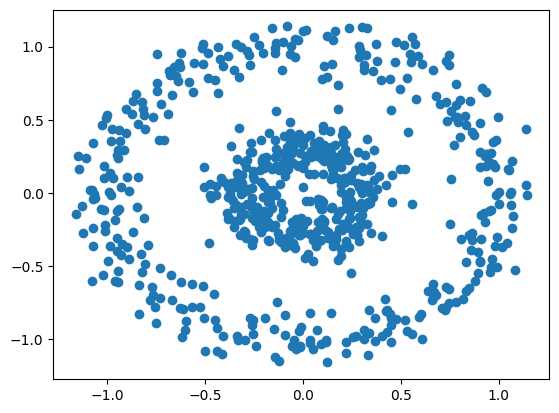

In [41]:
plt.scatter(X[:, 0], X[:, 1])

In [42]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(
    n_neighbors=20
)

In [43]:
lof.fit(X)

LocalOutlierFactor()

In [44]:
y_pred = lof.fit_predict(X)

In [45]:
anomalies = X[y_pred == -1]
anomalies

array([[ 0.49698871,  0.16418461],
       [ 0.55836513, -0.07455507],
       [ 0.2434577 , -0.54687063],
       [-0.13808865,  0.55988548],
       [-0.32870434,  0.44617522],
       [-0.4816697 , -0.34437933],
       [ 0.17966708,  0.57293223],
       [ 0.51955466,  0.16264654]])

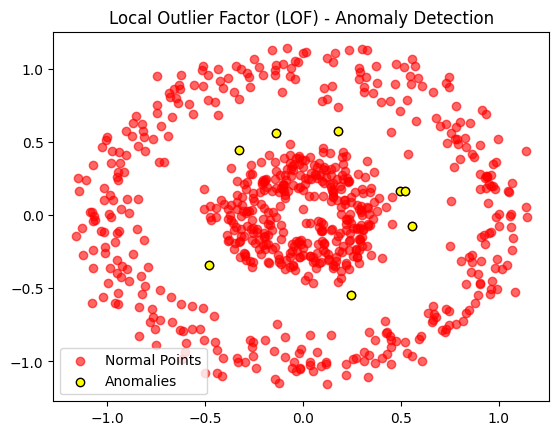

In [46]:
plt.scatter(X[:, 0], X[:, 1], c='red', label="Normal Points", alpha=0.6)
# Plot anomalies in red
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='yellow', edgecolors='k', label="Anomalies")

plt.legend()
plt.title("Local Outlier Factor (LOF) - Anomaly Detection")
plt.show()

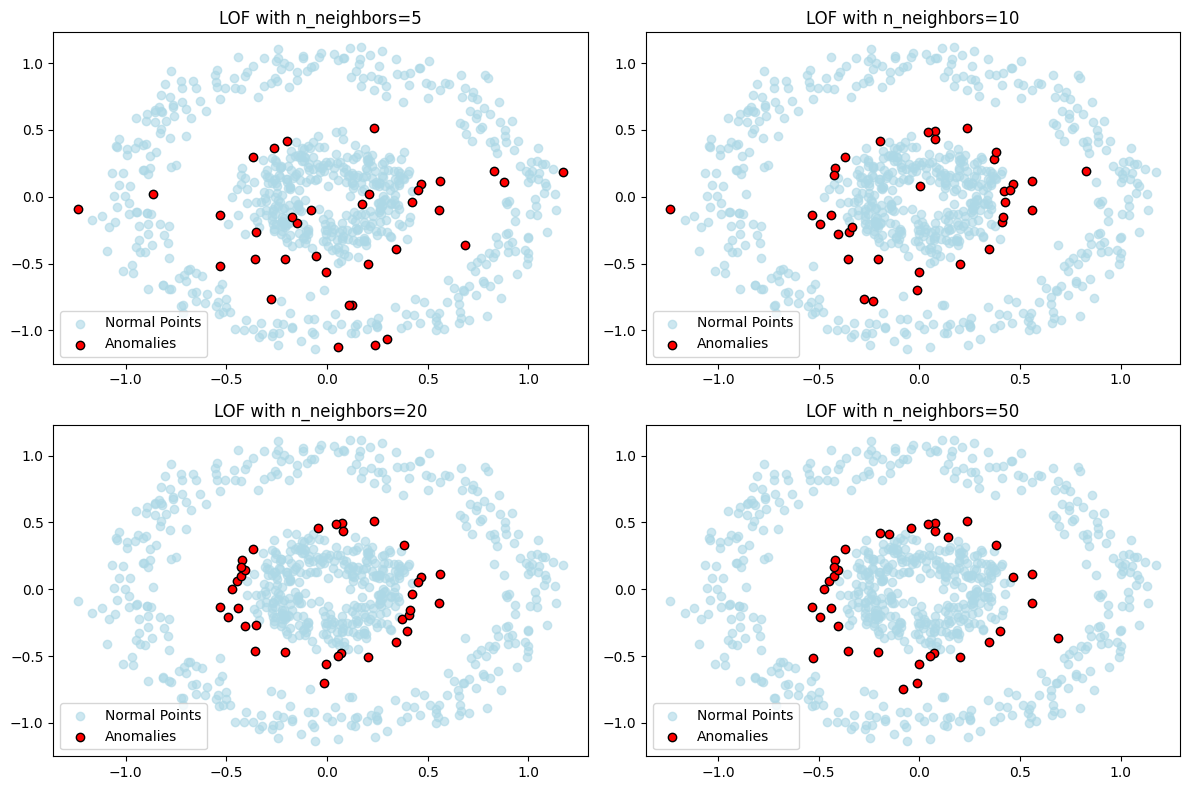

In [47]:
# Generate circular data
X, y = make_circles(n_samples=700, factor=0.3, noise=0.1)

# Try different values of n_neighbors
n_neighbors_list = [5, 10, 20, 50]

plt.figure(figsize=(12, 8))

for i, n in enumerate(n_neighbors_list, 1):
    lof = LocalOutlierFactor(n_neighbors=n, contamination=0.05)
    y_pred = lof.fit_predict(X)

    # Get indices of anomalies
    anomalies = X[y_pred == -1]

    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c='lightblue', label="Normal Points", alpha=0.6)
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', edgecolors='k', label="Anomalies")
    plt.title(f"LOF with n_neighbors={n}")
    plt.legend()

plt.tight_layout()
plt.show()

In [49]:
from sklearn.metrics import silhouette_score

# Test multiple values of n_neighbors
best_score = -1
best_n = None

for n in range(5, 51, 5):  # Trying values from 5 to 50
    lof = LocalOutlierFactor(n_neighbors=n, contamination=0.05)
    y_pred = lof.fit_predict(X)

    # Convert -1 (anomalies) to 1 and normal points to 0 for scoring
    labels = np.where(y_pred == -1, 1, 0)

    score = silhouette_score(X, labels)

    print(f"n_neighbors={n}, Silhouette Score={score}")

    if score > best_score:
        best_score = score
        best_n = n

print(f"\nBest n_neighbors: {best_n} with Silhouette Score: {best_score}")


n_neighbors=5, Silhouette Score=-0.032852801367550394
n_neighbors=10, Silhouette Score=-0.11013263671553894
n_neighbors=15, Silhouette Score=-0.13029427980467928
n_neighbors=20, Silhouette Score=-0.14254364668280753
n_neighbors=25, Silhouette Score=-0.14644388122677532
n_neighbors=30, Silhouette Score=-0.14127142149833638
n_neighbors=35, Silhouette Score=-0.14186768145352663
n_neighbors=40, Silhouette Score=-0.1360868312494533
n_neighbors=45, Silhouette Score=-0.1296880777785765
n_neighbors=50, Silhouette Score=-0.12309126488980514

Best n_neighbors: 5 with Silhouette Score: -0.032852801367550394


In [50]:
from itertools import product

# Define parameter grid
n_neighbors_values = [5, 10, 20, 30]
contamination_values = [0.02, 0.05, 0.1]

best_params = None
best_score = -1

# Try all combinations of parameters
for n, c in product(n_neighbors_values, contamination_values):
    lof = LocalOutlierFactor(n_neighbors=n, contamination=c)
    y_pred = lof.fit_predict(X)
    labels = np.where(y_pred == -1, 1, 0)  # Convert outliers to 1 for scoring
    score = silhouette_score(X, labels)

    print(f"n_neighbors={n}, contamination={c}, Silhouette Score={score}")

    if score > best_score:
        best_score = score
        best_params = (n, c)

print(f"\nBest Parameters: n_neighbors={best_params[0]}, contamination={best_params[1]}")


n_neighbors=5, contamination=0.02, Silhouette Score=-0.045006407308930525
n_neighbors=5, contamination=0.05, Silhouette Score=-0.032852801367550394
n_neighbors=5, contamination=0.1, Silhouette Score=-0.03753942569263772
n_neighbors=10, contamination=0.02, Silhouette Score=-0.1287090161418576
n_neighbors=10, contamination=0.05, Silhouette Score=-0.11013263671553894
n_neighbors=10, contamination=0.1, Silhouette Score=-0.0704641680633697
n_neighbors=20, contamination=0.02, Silhouette Score=-0.125932112430409
n_neighbors=20, contamination=0.05, Silhouette Score=-0.14254364668280753
n_neighbors=20, contamination=0.1, Silhouette Score=-0.11909082255284201
n_neighbors=30, contamination=0.02, Silhouette Score=-0.12746913315654387
n_neighbors=30, contamination=0.05, Silhouette Score=-0.14127142149833638
n_neighbors=30, contamination=0.1, Silhouette Score=-0.14532706940884674

Best Parameters: n_neighbors=5, contamination=0.05


In [51]:
from itertools import product

# Generate data
X, y = make_circles(n_samples=700, factor=0.3, noise=0.1)

# Define parameter grid
n_neighbors_values = [5, 10, 20, 30, 50]
contamination_values = [0.02, 0.05, 0.1]
best_params = None
best_score = -1

for n, c in product(n_neighbors_values, contamination_values):
    lof = LocalOutlierFactor(n_neighbors=n, contamination=c)
    y_pred = lof.fit_predict(X)
    labels = np.where(y_pred == -1, 1, 0)
    score = silhouette_score(X, labels)

    if score > best_score:
        best_score = score
        best_params = (n, c)

print(f"\nBest LOF Parameters: n_neighbors={best_params[0]}, contamination={best_params[1]}")


Best LOF Parameters: n_neighbors=5, contamination=0.05
